<a href="https://colab.research.google.com/github/freirepablo/Transfer_Learning/blob/main/Inception_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras import layers, models, optimizers
from keras.optimizers import RMSprop
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import os
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_path = '/content/drive/MyDrive/Dataset/Treino'
test_path = '/content/drive/MyDrive/Dataset/Validação'

In [ ]:
batch_size = 32
img_size = (224, 224)

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = batch_size,
                                            class_mode = 'categorical')

Found 2950 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


In [ ]:
inceptionv3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in inceptionv3.layers:
  layer.trainable = False

inceptionv3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_376 (Conv2D)         (None, 111, 111, 32)         864       ['input_5[0][0]']             
                                                                                                  
 batch_normalization_376 (B  (None, 111, 111, 32)         96        ['conv2d_376[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_376 (Activation  (None, 111, 111, 32)         0         ['batch_normalizati

In [ ]:
folders = glob('/content/drive/MyDrive/Dataset/Treino/*')
print(len(folders))

8


In [ ]:
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('melhor_modelo.h5',
                                                monitor='val_accuracy',
                                                save_best_only=True,
                                                mode='max',
                                                verbose=1)

history = model.fit(train_generator,
                    epochs=35,  # ajuste conforme necessário
                    validation_data=test_generator,
                    callbacks=[checkpoint])

Epoch 1/35
93/93 [==============================] - ETA: 0s - loss: 0.1985 - accuracy: 0.7210 
Epoch 1: val_accuracy improved from -inf to 0.87500, saving model to melhor_modelo.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


93/93 [==============================] - 1521s 16s/step - loss: 0.1985 - accuracy: 0.7210 - val_loss: 0.0829 - val_accuracy: 0.8750
Epoch 2/35
93/93 [==============================] - ETA: 0s - loss: 0.0909 - accuracy: 0.8820
Epoch 2: val_accuracy improved from 0.87500 to 0.92875, saving model to melhor_modelo.h5
93/93 [==============================] - 43s 465ms/step - loss: 0.0909 - accuracy: 0.8820 - val_loss: 0.0597 - val_accuracy: 0.9287
Epoch 3/35
93/93 [==============================] - ETA: 0s - loss: 0.0708 - accuracy: 0.9068
Epoch 3: val_accuracy improved from 0.92875 to 0.93375, saving model to melhor_modelo.h5
93/93 [==============================] - 43s 458ms/step - loss: 0.0708 - accuracy: 0.9068 - val_loss: 0.0445 - val_accuracy: 0.9337
Epoch 4/35
93/93 [==============================] - ETA: 0s - loss: 0.0551 - accuracy: 0.9332
Epoch 4: val_accuracy improved from 0.93375 to 0.96500, saving model to melhor_modelo.h5
93/93 [==============================] - 43s 461ms/step

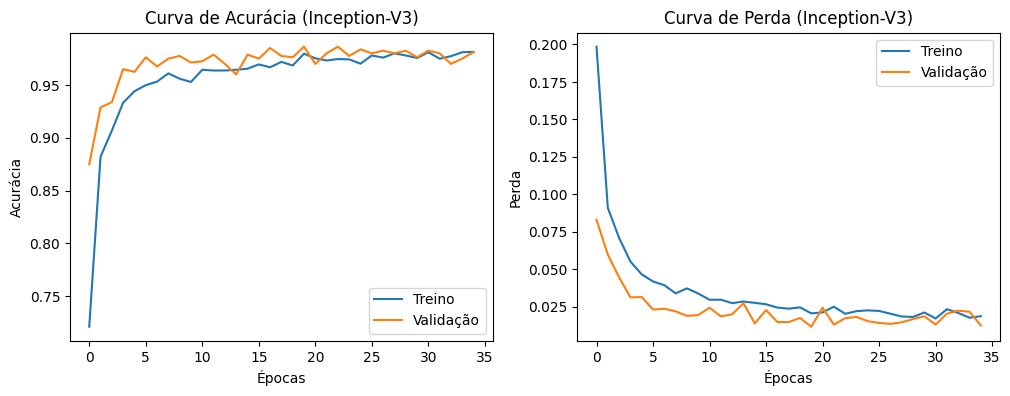

In [ ]:
# Plote as curvas de treino e teste
plt.figure(figsize=(12, 4))

# Plot da Acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Curva de Acurácia (Inception-V3)')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

# Plot da Perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Curva de Perda (Inception-V3)')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

In [ ]:
model.save('/content/drive/MyDrive/Modelos_Treinados_2/inception_model.h5')

Found 329 images belonging to 8 classes.
11/11 [==============================] - 70s 7s/step


<Figure size 1000x800 with 0 Axes>

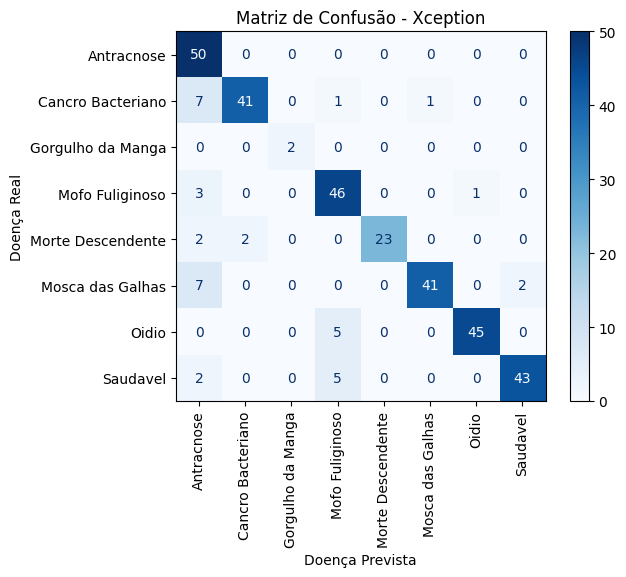

<Figure size 1000x800 with 0 Axes>

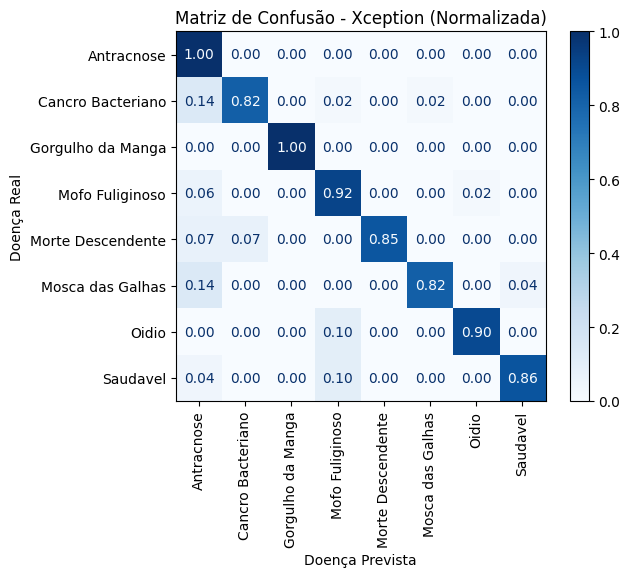

                   precision    recall  f1-score   support

       Antracnose       0.70      1.00      0.83        50
Cancro Bacteriano       0.95      0.82      0.88        50
Gorgulho da Manga       1.00      1.00      1.00         2
  Mofo Fuliginoso       0.81      0.92      0.86        50
Morte Descendente       1.00      0.85      0.92        27
 Mosca das Galhas       0.98      0.82      0.89        50
            Oidio       0.98      0.90      0.94        50
         Saudavel       0.96      0.86      0.91        50

         accuracy                           0.88       329
        macro avg       0.92      0.90      0.90       329
     weighted avg       0.90      0.88      0.89       329



In [ ]:
# Importe as bibliotecas necessárias
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import os
#from keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import ConfusionMatrixDisplay

# Carregue o modelo treinado
trained_model = load_model("/content/drive/MyDrive/Modelos_Treinados_2/inception_model.h5")  # Certifique-se de ter o nome correto do arquivo do modelo salvo

# Defina o caminho para a pasta de teste
test_path = '/content/drive/MyDrive/Dataset/Teste'

# Crie um gerador de dados para o conjunto de teste
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='categorical',
                                                  shuffle=False)

# Faça previsões no conjunto de teste
y_pred = trained_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

class_labels = list(test_generator.class_indices.keys())

# Crie a matriz de confusão
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plote a matriz de confusão não normalizada com valores absolutos
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay(confusion_mtx, display_labels=class_labels).plot(include_values=True, cmap='Blues', values_format='d')
plt.title('Matriz de Confusão - Xception')
plt.xticks(rotation=90)  # Adicionando rotação aos rótulos do eixo x
plt.xlabel('Doença Prevista')
plt.ylabel('Doença Real')
plt.show()

# Plote a matriz de confusão normalizada com percentuais
plt.figure(figsize=(10, 8))
confusion_mtx_normalized = confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis]
ConfusionMatrixDisplay(confusion_mtx_normalized, display_labels=class_labels).plot(include_values=True, cmap='Blues', values_format='.2f')
plt.title('Matriz de Confusão - Xception (Normalizada)')
plt.xticks(rotation=90)  # Adicionando rotação aos rótulos do eixo x
plt.xlabel('Doença Prevista')
plt.ylabel('Doença Real')
plt.show()

# Exiba métricas de classificação
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

In [ ]:
import cv2
import numpy as np
from keras.preprocessing import image

def get_gradcam(model, img_path, class_index, layer_name='conv2d_94'):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.0

    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(layer_name).output, model.output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(x)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_outputs)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_mean(tf.multiply(conv_outputs, pooled_grads), axis=-1)

    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

    return img, superimposed_img

# Escolha um índice de classe correspondente a uma doença específica
class_index = 0  # Substitua pelo índice da classe desejada

# Escolha uma imagem de folha doente para visualização
img_path = '/content/drive/MyDrive/Dataset/Teste/Antracnose/20211008_125152 (Custom).jpg'

# Obtenha as imagens original e sobrepostas
original_img, superimposed_img = get_gradcam(best_model, img_path, class_index)

# Mostre as imagens
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_img)
plt.title('Imagem Original')

plt.subplot(1, 2, 2)
plt.imshow(superimposed_img)
plt.title('Grad-CAM')
plt.show()


NameError: ignored